# 数据集
- 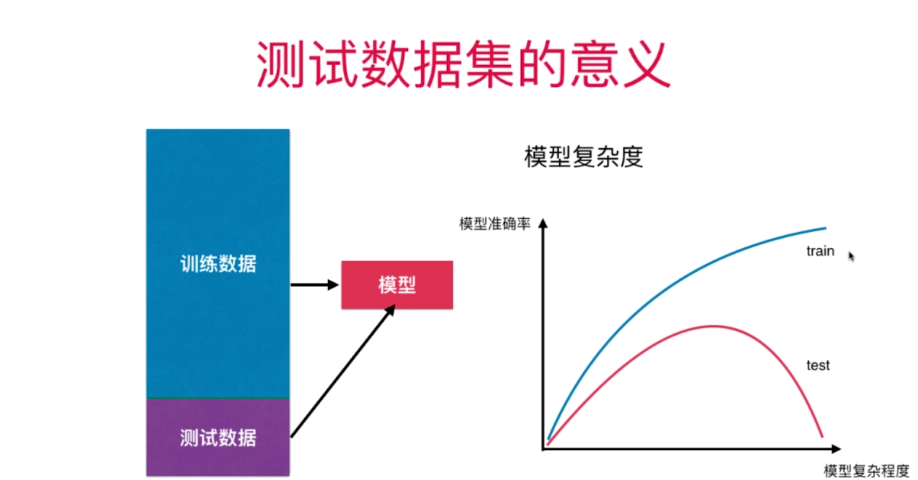
- 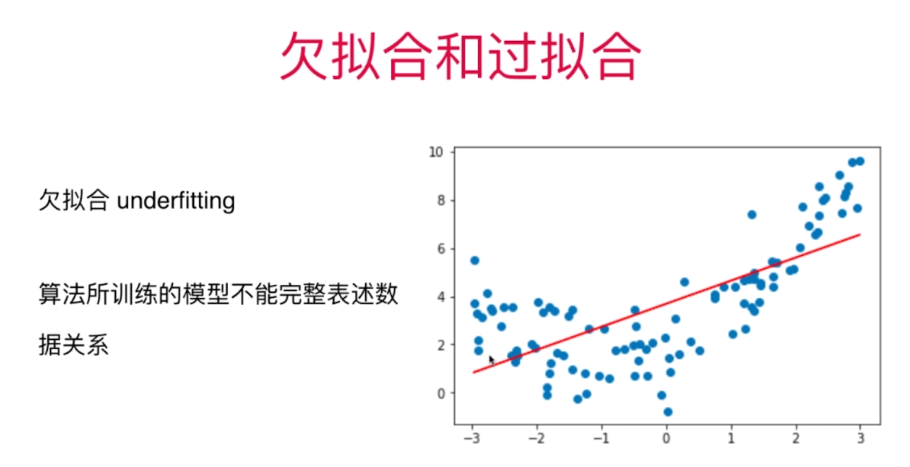
- 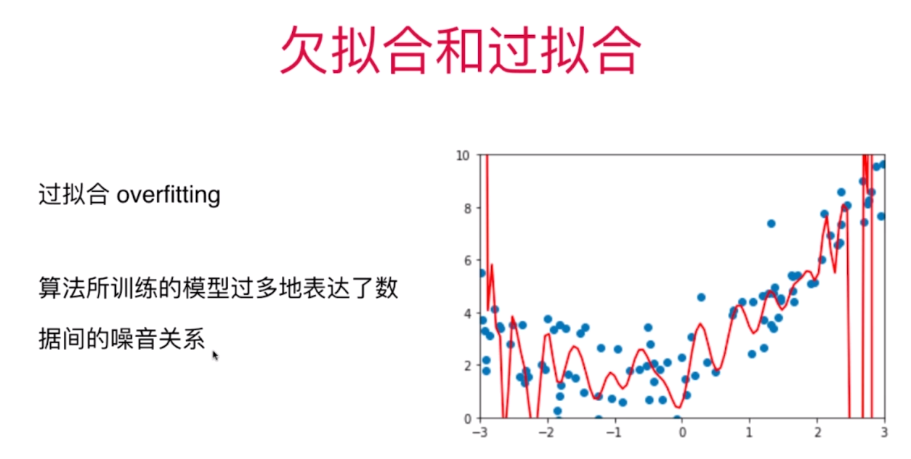
- 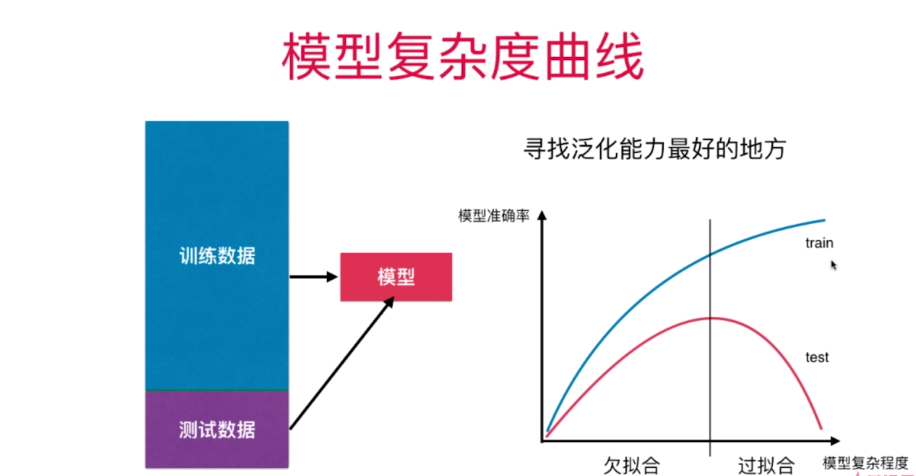

# 交叉验证
- 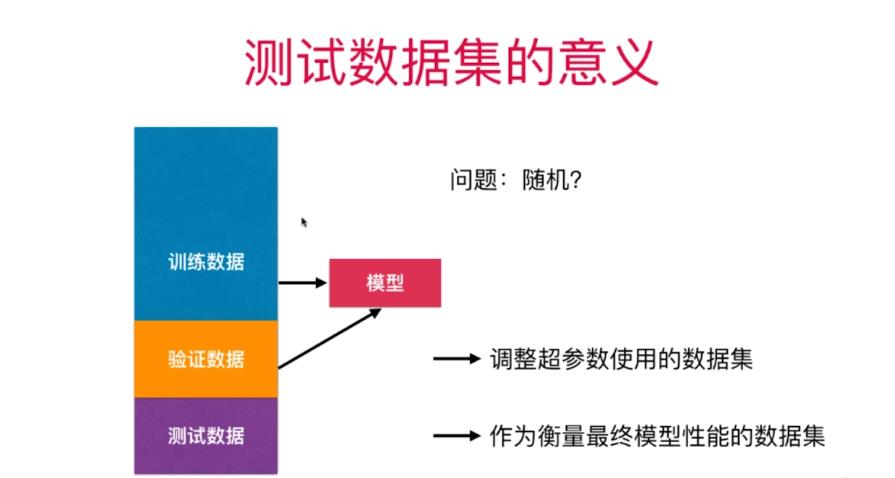
- 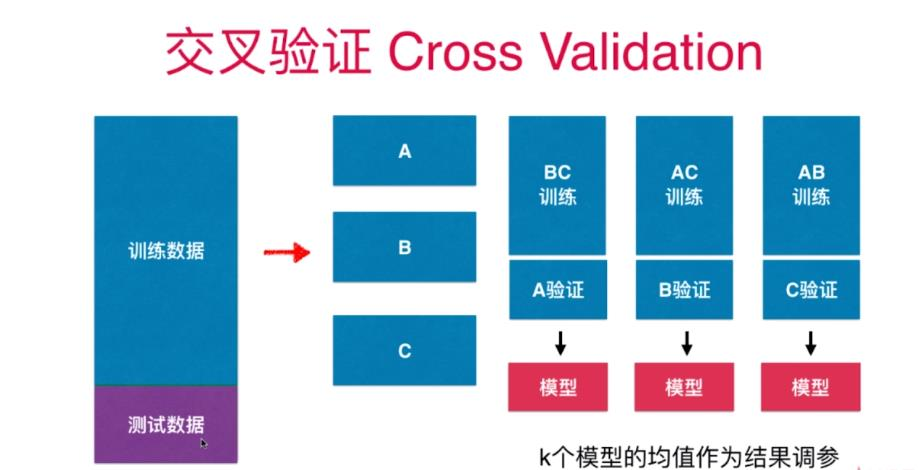
- 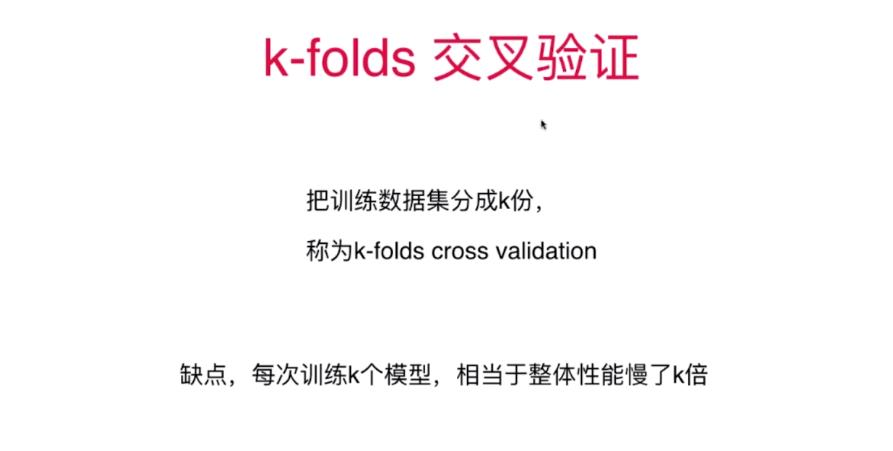
- 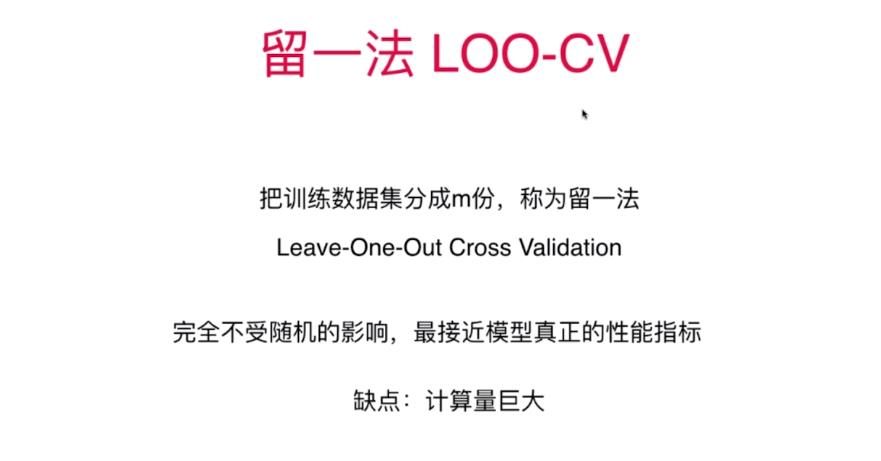

# 偏差方差权衡
1. 偏差与方差图例
    - 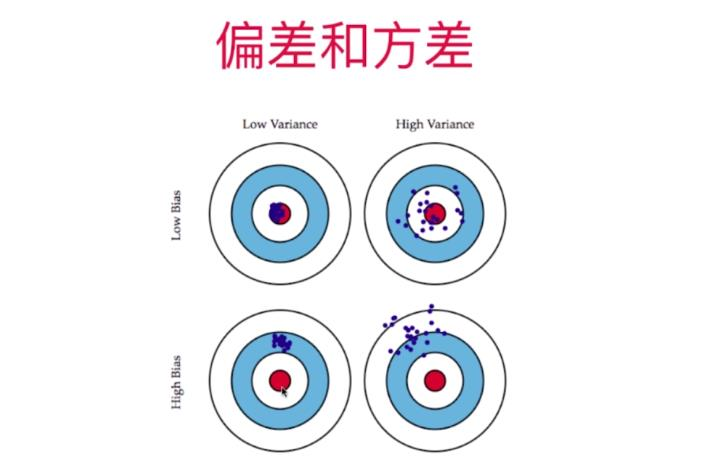
    - 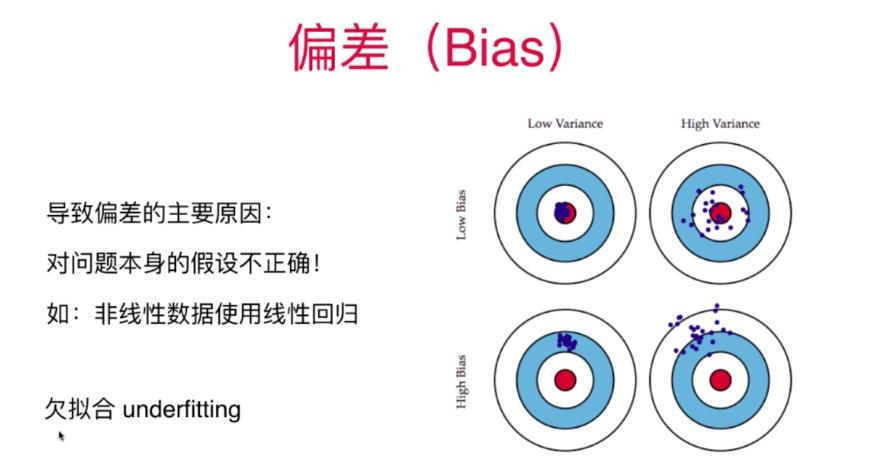
    - 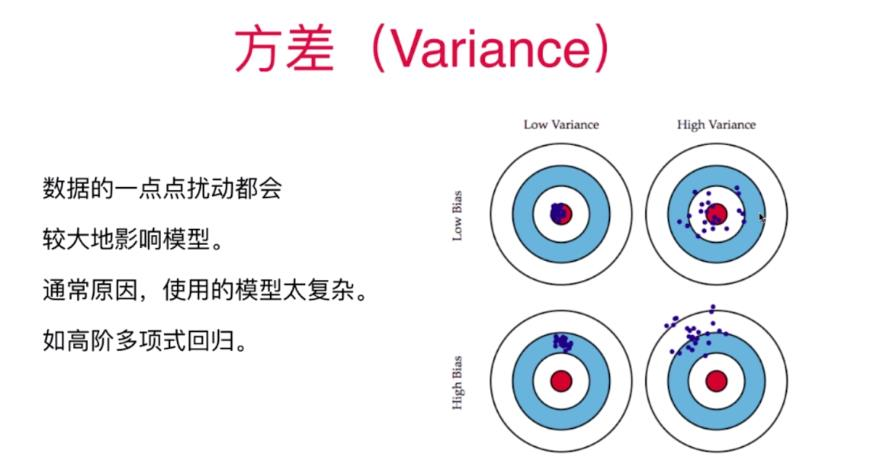
    - 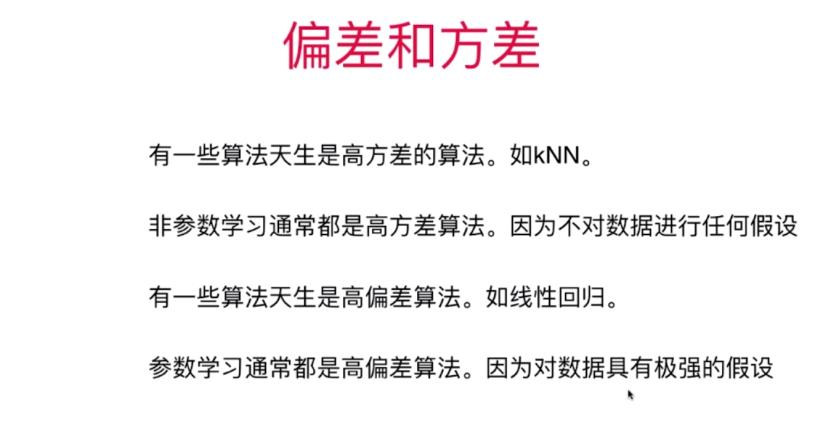
2. 偏差方差窘境
    - 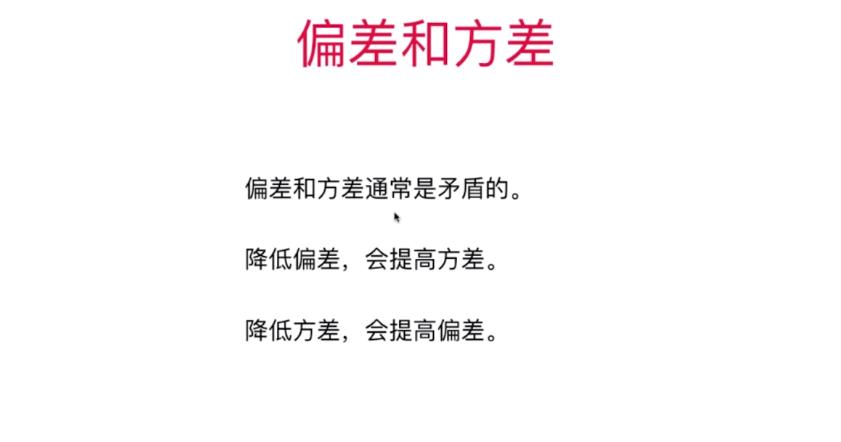
3. 模型的泛化误差
    - 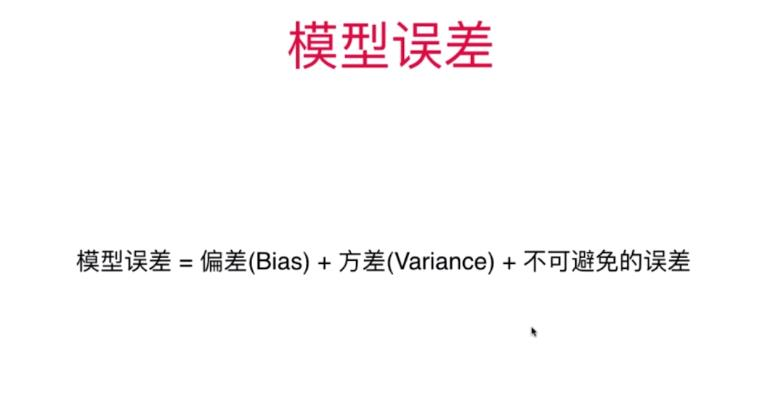
4. 偏差方差的联系
    - 最理想的是低偏差、低方差，但是难以实现，所以需要权衡二者
    - 当数据的特征情况比较好时，偏差合适，则ML的主要挑战来源于高方差问题
5. 解决高方差的常用手段
    - 降低模型复杂度
    - 降低数据维度、降噪
    - 增加样本数量
    - 使用验证集
    - 模型正则化

# train_test_split：训练测试分离

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
# digits.keys()
# print(digits.DESCR)

X = iris.data
y = iris.target

# shuffle_indexes = np.random.permutation(len(X)) #随机排序（不包含）
# test_ratio = 0.2
# test_size = int(len(X) * test_ratio)
# test_indexes = shuffle_indexes[:test_size]
# train_indexes = shuffle_indexes[test_size:]
# X_train = X[train_indexes]
# y_train = y[train_indexes]
# X_test = X[test_indexes]
# y_test = y[test_indexes]

#上面为等价的自定义的分离过程
#test_size为测试集所占的比例
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=666)

# accuracy：分类准确度

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [14]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [24]:
some_digit = X[666]
y[666]

0

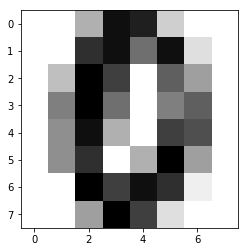

In [25]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

### sklearn中的accuracy_score

In [31]:
#random_state用于设置种子数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=666)
kNN_clf = KNeighborsClassifier(n_neighbors=3)
kNN_clf.fit(X_train, y_train)
y_predict = kNN_clf.predict(X_test)

accuracy_score(y_test, y_predict)

0.98888888888888893

### KNeighborsClassifier中的score

In [30]:
kNN_clf.score(X_test, y_test)

0.98888888888888893

# 网格搜索：GridSearch

### GridSearchCV参数说明
- estimator：待评估的分类器对象（第一个必选）
- param_grid：设置待搜索的参数范围（第二个必须）
- n_jobs：并发处理核心数量，默认为1（可选）
- verbose：显示处理过程的信息，数量越大越详细（可选）
- cv：设置每次将数据分为几份进行交叉验证

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

param_grid = [ #total:10+50=60 candidates
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 11)]  #11-1=10 candidates
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 11)], #10*5=50 candidates
        'p':[i for i in range(1, 6)]
    }
]

kNN_clf = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=kNN_clf, param_grid=param_grid, n_jobs=-1, verbose=5)

In [6]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.2s


Wall time: 36 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

##### 返回求得的最优参数分类器的对象

In [7]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

##### 返回最优参数分类器的准确率

In [8]:
grid_search.best_score_

0.98538622129436326

##### 返回最优参数

In [9]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

##### 使用最优参数分类器获得准确率

In [10]:
kNN_clf = grid_search.best_estimator_
kNN_clf.score(X_test, y_test)

0.98333333333333328

# sklearn中的CV

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [4]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3)  #参数cv用于将数据设置分成多少份

array([ 0.98895028,  0.97777778,  0.96629213])

In [5]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("Best k =", best_k)
print("Best p =", best_p)
print("Best score =", best_score)

Best k = 2
Best p = 2
Best score = 0.982359987401


##### 利用上述结果创建一个best评估器

In [6]:
best_knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.98052851182197498

In [8]:
train_test_split?